<a href="https://colab.research.google.com/github/DeepikaS04/Handwritten-character-and-digit-recognition-/blob/main/Characters_and_digit_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import imutils
import matplotlib
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import tensorflow as tf

from keras.models import Sequential, load_model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import layers
from keras.layers import *
from keras.utils import np_utils

from tqdm import tqdm

import numpy as np 
import pandas as pd 

from imutils.contours import sort_contours

In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/Data/EMNIST/emnist-byclass-train.csv', header=None, nrows=300000)

In [ ]:
train_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784
0,35,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
train_df.shape

(300000, 785)

In [ ]:
X_train = train_df.loc[:, 1:]
y_train = train_df.loc[:, 0]

X_train.shape, y_train.shape

((300000, 784), (300000,))

In [ ]:
X_train.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
y_train.head()

0    35
1    36
2     6
3     3
4    22
Name: 0, dtype: int64

In [ ]:
label_map = pd.read_csv("/content/drive/MyDrive/Data/EMNIST/emnist-byclass-mapping.txt", 
                        delimiter = ' ', 
                        index_col=0, 
                        header=None, 
                        squeeze=True)
label_map.head()

0
0    48
1    49
2    50
3    51
4    52
Name: 1, dtype: int64

In [ ]:
label_dictionary = {}
for index, label in enumerate(label_map):
    label_dictionary[index] = chr(label)

label_dictionary

{0: '0',
 1: '1',
 2: '2',
 3: '3',
 4: '4',
 5: '5',
 6: '6',
 7: '7',
 8: '8',
 9: '9',
 10: 'A',
 11: 'B',
 12: 'C',
 13: 'D',
 14: 'E',
 15: 'F',
 16: 'G',
 17: 'H',
 18: 'I',
 19: 'J',
 20: 'K',
 21: 'L',
 22: 'M',
 23: 'N',
 24: 'O',
 25: 'P',
 26: 'Q',
 27: 'R',
 28: 'S',
 29: 'T',
 30: 'U',
 31: 'V',
 32: 'W',
 33: 'X',
 34: 'Y',
 35: 'Z',
 36: 'a',
 37: 'b',
 38: 'c',
 39: 'd',
 40: 'e',
 41: 'f',
 42: 'g',
 43: 'h',
 44: 'i',
 45: 'j',
 46: 'k',
 47: 'l',
 48: 'm',
 49: 'n',
 50: 'o',
 51: 'p',
 52: 'q',
 53: 'r',
 54: 's',
 55: 't',
 56: 'u',
 57: 'v',
 58: 'w',
 59: 'x',
 60: 'y',
 61: 'z'}

In [ ]:
# Sample entry number 42
sample_image = X_train.iloc[42]
sample_label = y_train.iloc[42]
sample_image.shape, sample_label

((784,), 1)

In [ ]:
W = 28
H = 28

Label entry 42: 1


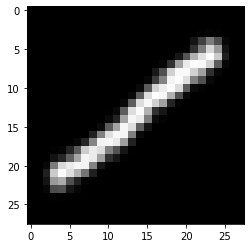

In [ ]:
print("Label entry 42:", label_dictionary[sample_label])
plt.imshow(sample_image.values.reshape(W, H), cmap=plt.cm.gray)
plt.show()

Label entry 42: 1


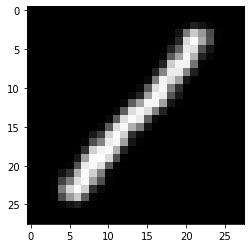

In [ ]:
def reshape_and_rotate(image):
    W = 28
    H = 28
    image = image.reshape(W, H)
    image = np.fliplr(image)
    image = np.rot90(image)
    return image

print("Label entry 42:", label_dictionary[sample_label])
plt.imshow(reshape_and_rotate(sample_image.values), cmap=plt.cm.gray)
plt.show()

In [ ]:
# note: np.apply_along_axis returns a numpy array, X_train is not a pandas.DataFrame anymore
X_train = np.apply_along_axis(reshape_and_rotate, 1, X_train.values)
X_train.shape

(300000, 28, 28)

Label entry 42: 1


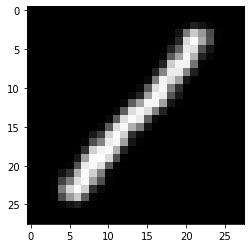

In [ ]:
sample_image = X_train[42]
sample_label = y_train.iloc[42]
print("Label entry 42:", label_dictionary[sample_label])
plt.imshow(sample_image.reshape(W, H), cmap=plt.cm.gray)
plt.show()


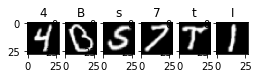

In [ ]:
for i in range(100, 106):
    plt.subplot(390 + (i+1))
    plt.imshow(X_train[i], cmap=plt.cm.gray)
    plt.title(label_dictionary[y_train[i]])

In [ ]:
X_train = X_train.astype('float32') / 255

In [ ]:
number_of_classes = y_train.nunique()
number_of_classes

62

In [ ]:
y_train = np_utils.to_categorical(y_train, number_of_classes)
y_train.shape

(300000, 62)

In [ ]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
# Reshape to fit model input shape
# Tensorflow (batch, width, height, channels)
X_train = X_train.reshape(-1, W, H, 1)
X_train.shape

(300000, 28, 28, 1)

In [ ]:
# Split 10% validation 
X_train, X_val, y_train, y_val = train_test_split(X_train, 
                                                  y_train, 
                                                  test_size= 0.1, 
                                                  random_state=88)

#Extra Model

##64,494

In [ ]:
model = Sequential()

model.add(layers.Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(layers.AveragePooling2D())

model.add(layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
model.add(layers.AveragePooling2D())

model.add(layers.Flatten())

model.add(layers.Dense(units=120, activation='relu'))

model.add(layers.Dense(units=84, activation='relu'))

model.add(layers.Dense(units=number_of_classes, activation = 'softmax'))

model.summary()

##25,759,534

In [ ]:
#Instantiation
model = Sequential()

#1st Convolutional Layer
model.add(Conv2D(filters=96, input_shape=(28,28,1), kernel_size=(11,11), strides=(4,4), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(5, 5), strides=(1,1), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#3rd Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

#4th Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

#5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#Passing it to a Fully Connected layer
model.add(Flatten())
# 1st Fully Connected Layer
model.add(Dense(4096, input_shape=(32,32,3,)))
model.add(BatchNormalization())
model.add(Activation('relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.4))

#2nd Fully Connected Layer
model.add(Dense(4096))
model.add(BatchNormalization())
model.add(Activation('relu'))
#Add Dropout
model.add(Dropout(0.4))

#3rd Fully Connected Layer
model.add(Dense(1000))
model.add(BatchNormalization())
model.add(Activation('relu'))
#Add Dropout
model.add(Dropout(0.4))

#Output Layer
model.add(Dense(number_of_classes))
model.add(BatchNormalization())
model.add(Activation('softmax'))

#Model Summary
model.summary()

#Model

In [ ]:
model = Sequential()

model.add(layers.Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPool2D(strides=2))
model.add(layers.Conv2D(filters=48, kernel_size=(5,5), padding='valid', activation='relu'))
model.add(layers.MaxPool2D(strides=2))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(84, activation='relu'))
model.add(layers.Dense(number_of_classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 48)        38448     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 48)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1200)              0         
                                                                 
 dense (Dense)               (None, 256)               3

#TRAINING

In [ ]:
optimizer_name = 'adam'

model.compile(loss='categorical_crossentropy', optimizer=optimizer_name, metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min')
mcp_save = ModelCheckpoint('sequential_373,594params(25epochs_byclass_300000).h5', save_best_only=True, monitor='val_loss', verbose=1, mode='auto')

In [ ]:
history = model.fit(X_train,
                    y_train, 
                    epochs=15, 
                    batch_size=64,
                    verbose=1, 
                    validation_split=0.2,
                    callbacks=[mcp_save])

Epoch 1/15
3375/3375 [==============================] - ETA: 0s - loss: 0.6111 - accuracy: 0.8015
Epoch 00001: val_loss improved from inf to 0.44567, saving model to sequential_373,594params(25epochs_byclass_300000).h5
3375/3375 [==============================] - 485s 144ms/step - loss: 0.6111 - accuracy: 0.8015 - val_loss: 0.4457 - val_accuracy: 0.8386
Epoch 2/15
3375/3375 [==============================] - ETA: 0s - loss: 0.4197 - accuracy: 0.8482
Epoch 00002: val_loss improved from 0.44567 to 0.41268, saving model to sequential_373,594params(25epochs_byclass_300000).h5
3375/3375 [==============================] - 479s 142ms/step - loss: 0.4197 - accuracy: 0.8482 - val_loss: 0.4127 - val_accuracy: 0.8536
Epoch 3/15
3375/3375 [==============================] - ETA: 0s - loss: 0.3834 - accuracy: 0.8587
Epoch 00003: val_loss improved from 0.41268 to 0.40522, saving model to sequential_373,594params(25epochs_byclass_300000).h5
3375/3375 [==============================] - 320s 95ms/step -

In [ ]:
# plot accuracy and loss
def plotgraph(epochs, acc, val_acc):
    # Plot training & validation accuracy values
    plt.plot(epochs, acc, 'b')
    plt.plot(epochs, val_acc, 'r')
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()
    
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(acc)+1)

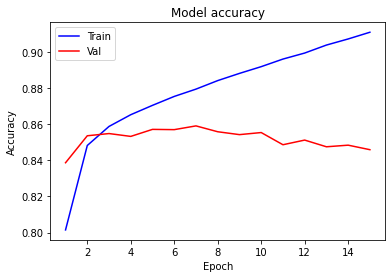

In [ ]:
# Accuracy curve
plotgraph(epochs, acc, val_acc)

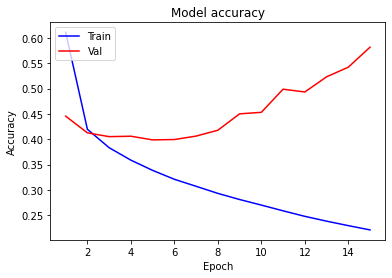

In [ ]:
# loss curve
plotgraph(epochs, loss, val_loss)

# pred

In [ ]:
y_pred = model.predict(X_val)
y_pred.shape

(30000, 62)

In [ ]:
z = model.predict(X_train)
z[0]

array([1.2012488e-25, 8.6080481e-13, 2.9675488e-22, 4.1849268e-24,
       1.1912533e-13, 1.3555029e-26, 3.3030674e-25, 2.0869732e-17,
       3.4551369e-23, 5.3123312e-22, 7.1046943e-16, 7.5478669e-30,
       2.0462083e-18, 2.2227303e-34, 7.1202242e-28, 2.9652458e-11,
       8.6133520e-32, 6.3876479e-19, 5.4459369e-19, 1.6717955e-16,
       8.1752677e-24, 1.1492405e-22, 2.0526239e-21, 7.0769812e-20,
       8.4260177e-12, 4.3790247e-18, 0.0000000e+00, 8.7113708e-37,
       3.1894812e-12, 4.4809835e-04, 2.8355050e-28, 3.6830568e-23,
       4.3161827e-27, 4.9737250e-24, 2.0783442e-18, 1.0638545e-16,
       3.2781820e-21, 4.5415106e-19, 1.9286726e-22, 3.1139566e-20,
       6.4241760e-13, 7.7437072e-08, 3.4627641e-30, 5.2821008e-11,
       6.4080726e-20, 4.5837162e-12, 1.7080691e-16, 1.7991063e-22,
       5.8318204e-25, 9.2842590e-20, 2.8346581e-23, 3.8350645e-16,
       1.7257958e-27, 7.5061908e-11, 1.1285023e-19, 9.9955183e-01,
       1.0746648e-21, 1.1025235e-21, 1.9912717e-20, 1.7897858e

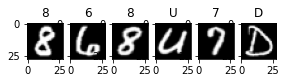

In [ ]:
for i in range(10, 16):
    plt.subplot(380 + (i%10+1))
    plt.imshow(X_val[i].reshape(28, 28), cmap=plt.cm.gray)
    plt.title(label_dictionary[y_pred[i].argmax()])

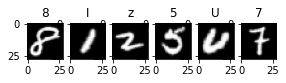

In [ ]:
for i in range(42, 48):
    plt.subplot(380 + (i%10+1))
    plt.imshow(X_val[i].reshape(28, 28), cmap=plt.cm.gray)
    plt.title(label_dictionary[y_pred[i].argmax()])

In [ ]:
model.evaluate(X_val, y_val)

938/938 [==============================] - 14s 15ms/step - loss: 0.5609 - accuracy: 0.8459


[0.5609339475631714, 0.8458666801452637]

In [ ]:
# load the input image from disk, convert it to grayscale, and blur
# it to reduce noise
image = cv2.imread('')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

In [ ]:
# perform edge detection, find contours in the edge map, and sort the
# resulting contours from left-to-right
edged = cv2.Canny(blurred, 30, 150)
cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
	
cnts = imutils.grab_contours(cnts)
cnts = sort_contours(cnts, method="left-to-right")[0]

In [ ]:
# initialize the list of contour bounding boxes and associated
# characters that we'll be OCR'ing
chars = []

In [ ]:
# loop over the contours
for c in cnts:
	# compute the bounding box of the contour
	(x, y, w, h) = cv2.boundingRect(c)

	# filter out bounding boxes, ensuring they are neither too small
	# nor too large
	if (w >= 5 and w <= 150) and (h >= 15 and h <= 120):
		# extract the character and threshold it to make the character
		# appear as *white* (foreground) on a *black* background, then
		# grab the width and height of the thresholded image
		roi = gray[y:y + h, x:x + w]
		thresh = cv2.threshold(roi, 0, 255,
			cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
		(tH, tW) = thresh.shape

		# if the width is greater than the height, resize along the
		# width dimension
		if tW > tH:
			thresh = imutils.resize(thresh, width=28)

		# otherwise, resize along the height
		else:
			thresh = imutils.resize(thresh, height=28)

		# re-grab the image dimensions (now that its been resized)
		# and then determine how much we need to pad the width and
		# height such that our image will be 32x32
		(tH, tW) = thresh.shape
		dX = int(max(0, 28 - tW) / 2.0)
		dY = int(max(0, 28 - tH) / 2.0)

		# pad the image and force 32x32 dimensions
		padded = cv2.copyMakeBorder(thresh, top=dY, bottom=dY,
			left=dX, right=dX, borderType=cv2.BORDER_CONSTANT,
			value=(0, 0, 0))
		padded = cv2.resize(padded, (28, 28))

		# prepare the padded image for classification via our
		# handwriting OCR model
		padded = padded.astype("float32") / 255.0
		padded = np.expand_dims(padded, axis=-1)

		# update our list of characters that will be OCR'd
		chars.append((padded, (x, y, w, h)))

In [ ]:
# extract the bounding box locations and padded characters
boxes = [b[1] for b in chars]
chars = np.array([c[0] for c in chars], dtype="float32")

In [ ]:
# OCR the characters using our handwriting recognition model
preds = model.predict(chars)

In [ ]:
# define the list of label names
labelNames = "0123456789"
labelNames += "ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz"
labelNames = [l for l in labelNames]

In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
# loop over the predictions and bounding box locations together
for (pred, (x, y, w, h)) in zip(preds, boxes):
	# find the index of the label with the largest corresponding
	# probability, then extract the probability and label
	i = np.argmax(pred)
	prob = pred[i]
	label = labelNames[i]

	# draw the prediction on the image
	print("[INFO] {} - {:.2f}%".format(label, prob * 100))
	cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
	cv2.putText(image, label, (x - 10, y - 10),
	cv2.FONT_HERSHEY_SIMPLEX, 1.2, (0, 255, 0), 2)

# show the image
cv2_imshow(image)